In [19]:
from keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from keras import Input
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras import optimizers, initializers, regularizers, metrics
import math
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Flatten
from keras.models import Model
from keras import models, layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import math
import shutil
import dlib
from keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(rescale=1./255,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

batch_size = 256
dir = os.getcwd()
train_dir = dir + '/dataset/train/'
test_dir = dir + '/dataset/test/'

In [20]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=batch_size, target_size=(220,200), color_mode='rgb',class_mode='categorical',subset="training")
validation_generator = train_datagen.flow_from_directory(train_dir, batch_size=batch_size, target_size=(220,200), color_mode='rgb',class_mode='categorical',subset="validation")

Found 55 images belonging to 1 classes.
Found 13 images belonging to 1 classes.


In [25]:
#다중 GPU 사용 모델 불러오기
#사용할 GPU 수 정의
a = [0,1,2,3,4,5,6,7]
b = []

#gpu_num = int(input('사용할 GPU수를 정해주세요: ex)1'))
gpu_num = 1

for i in range(gpu_num):
    b.append(a[i])

b = str(b)
b = b.replace('[','')
b = b.replace(']','')


os.environ["CUDA_VISIBLE_DEVICES"] = b
 
initial_model = VGG16(weights='imagenet', include_top=False, input_shape=(220, 200, 3), classes= 1)
last = initial_model.output

x = Flatten()(last)
predictions = Dense(1, activation='softmax')(x)

additional_model = Model(initial_model.input, predictions)

checkpoint = [
tf.keras.callbacks.EarlyStopping(patience=4),
tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',monitor='loss', 
        mode='min', save_best_only=True, verbose=1),
tf.keras.callbacks.TensorBoard(log_dir='./logs')]


additional_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [27]:
history = additional_model.fit(train_generator, 
        steps_per_epoch=train_generator.samples // batch_size,                      
        epochs=100, 
        validation_data=validation_generator, 
        validation_steps=validation_generator.samples // batch_size, 
        callbacks=[checkpoint])

Epoch 1/100


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

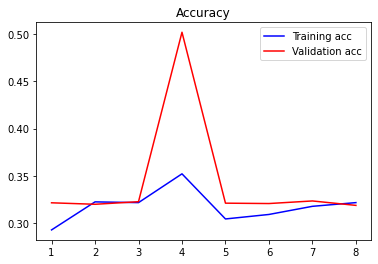

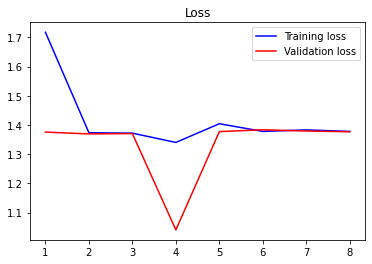

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [13]:
os.chdir(dir)
additional_model = load_model('./pretrained_VGG_weight.hdf5')


In [14]:
yhat_test = additional_model.predict(validation_generator, batch_size=32)

In [21]:
test_input = int(input('몇번째 파일을 테스트할 것입니까? : ex) 1'))

print('A: ', '%.1f%%' % (yhat_test[test_input][0]*100))
print('B: ', '%.1f%%' % (yhat_test[test_input][1]*100))
print('C: ', '%.1f%%' % (yhat_test[test_input][2]*100))
print('D: ', '%.1f%%' % (yhat_test[test_input][3]*100))

A:  96.7%
B:  0.0%
C:  3.2%
D:  0.1%


In [ ]:
total_images = len(img)
images = {show_result[i]: img[i] for i in range(total_images)}

display_multiple_img(images, 4, 3)